<div style="color:#F37335;
           display:fill;
           border-radius:15px;
           background-color:gray;
           font-size:140%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h4 style="padding: 18px; color:white; text-align:center"><b>Quora questions pair classification with NLP 📚</b></h4>
</div>

# <span style='color:#6dd5ed'>1.Introduction  🚀:</span>

`Quora` is a question-and-answer platform that was founded in 2009. It is a popular platform that allows users to ask and answer questions on a wide range of topics, including technology, politics, education, and more. The platform has grown significantly in popularity over the years, and it now has over 300 million monthly active users.

One of the main features that makes Quora unique is its community-driven approach to knowledge sharing. The platform allows users to ask questions on any topic, and anyone can provide an answer. This means that users can get insights and perspectives from a wide range of people, including experts in the field, enthusiasts, and people with personal experience.

With millions of questions and answers on the platform, it can be challenging to identify duplicate or similar questions. However, using machine learning techniques, it is possible to analyze large datasets of questions and identify pairs of questions that are similar or identical.

Let’s consider the following two Quora questions: 

Question 1:“How can I improve my English language skills?” \
Question 1:“What are some effective methods for enhancing my English language proficiency?” 

While these questions are phrased differently, their underlying intent is the same — both are seeking advice on improving English language skills. As a result, the answers to these questions are likely to be quite similar. 📊🧠🔍🌐💡🤖📚👩‍💻🚀

# <span style="color:#6dd5ed">2.Import Packages📊</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

In [3]:
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix,f1_score,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
import re
from tqdm import tqdm
import time
import inflect
import nltk

In [4]:
from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from gensim.models import Word2Vec

In [5]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from collections import Counter

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/sujon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sujon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sujon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <span style="color:#6dd5ed">3.Exploratory Data Analysis</span>

## <span style='color:#00B4DB'>3.1.Data Overview : </span>

In [8]:
quora=pd.read_csv('Train.csv')

In [7]:
quora.shape

(404290, 6)

In [8]:
quora=quora[:5290]

In [9]:
quora.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
quora.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate
5285,5285,10405,10406,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,1
5286,5286,10407,10408,I am mechanical engineer. can I opted for data...,Experiences of IPS?,0
5287,5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1
5288,5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1
5289,5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0


The Quora dataset comprises `404,350` rows and `six columns`, providing a rich source of information for natural language processing tasks. Here's a brief description of each column:

1. **id:** A unique identifier for each row in the dataset.

2. **qid1:** The identifier for the first question in a question pair.

3. **qid2:** The identifier for the second question in a question pair.

4. **question1:** The text of the first question in a pair.

5. **question2:** The text of the second question in a pair.

6. **is_duplicate:** A binary indicator (0 or 1) that denotes whether the two questions in a pair are considered duplicates (1) or not (0).

This huge dataset is particularly useful for tasks related to duplicate question identification, making it valuable for exploring natural language processing techniques and machine learning models. 

In [11]:
quora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            5290 non-null   int64 
 1   qid1          5290 non-null   int64 
 2   qid2          5290 non-null   int64 
 3   question1     5290 non-null   object
 4   question2     5290 non-null   object
 5   is_duplicate  5290 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 248.1+ KB


In [12]:
quora.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [13]:
quora.describe()

,id,qid1,qid2,is_duplicate
count,5290.000000,5290.000000,5290.000000,5290.000000
mean,2644.500000,5180.770132,5176.020227,0.382609
std,1527.235793,3014.865535,2999.917346,0.486070
min,0.000000,1.000000,2.000000,0.000000
25%,1322.250000,2558.500000,2577.500000,0.000000
50%,2644.500000,5165.000000,5170.000000,0.000000
75%,3966.750000,7799.500000,7761.500000,1.000000
max,5289.000000,10413.000000,10414.000000,1.000000


In [14]:
quora['is_duplicate'].value_counts()

0    3266
1    2024
Name: is_duplicate, dtype: int64

In [15]:
quora.is_duplicate.unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
5285    1
5286    0
5287    1
5288    1
5289    0
Name: is_duplicate, Length: 5290, dtype: int64>

In [16]:
quora.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
quora.is_duplicate.sum()

2024

`check duplicate rows and similar rows `

## <span style="color : #00B4DB">3.2.Text Analysis</span>

### Word Cloud

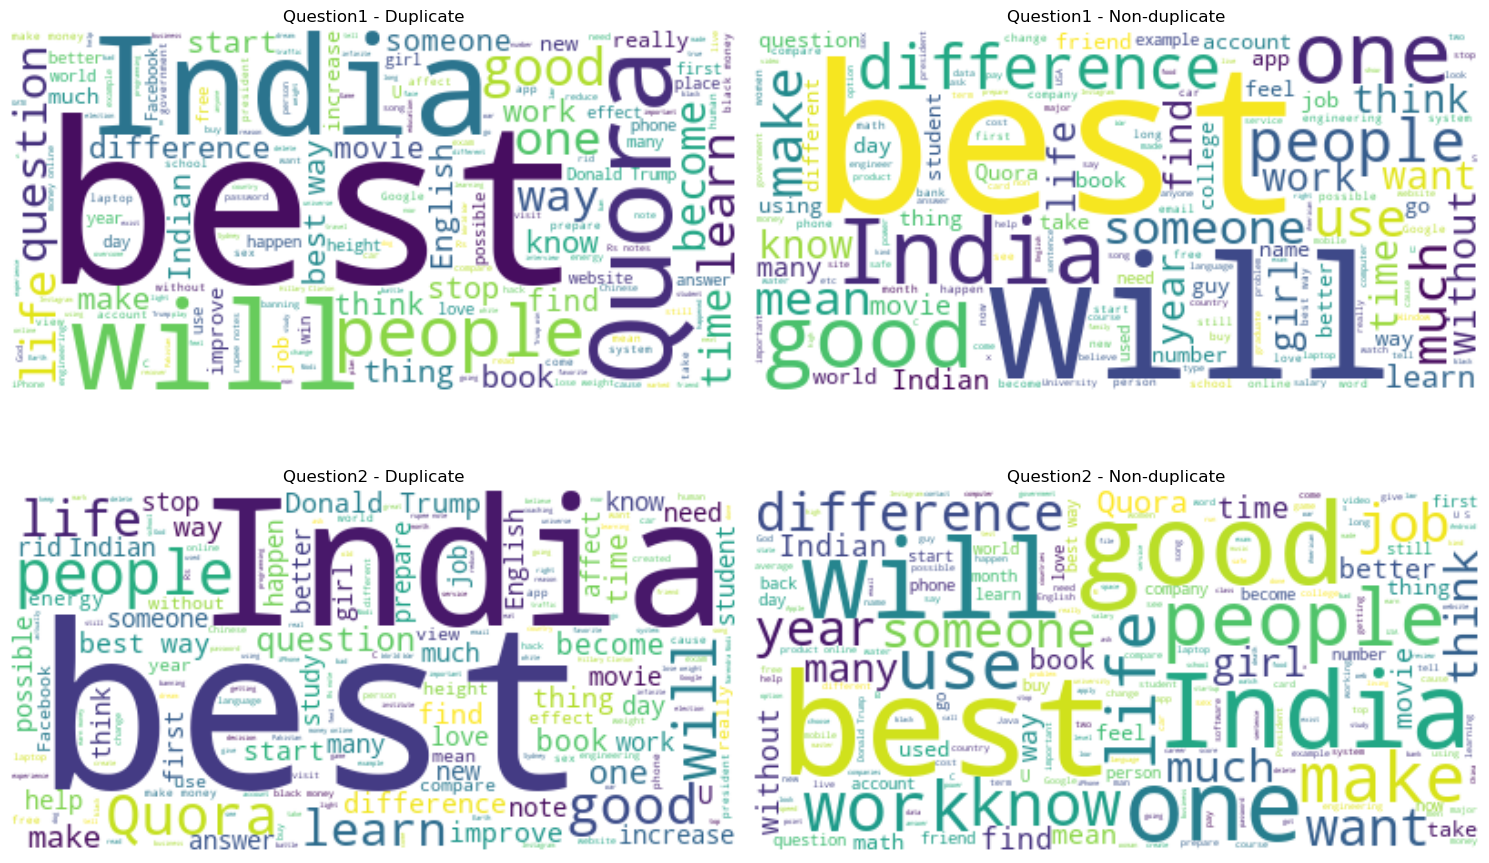

In [78]:
# Function to generate and plot word clouds
def generate_wordcloud(data_q1_duplicate, data_q1_non_duplicate, data_q2_duplicate, data_q2_non_duplicate):
    # Generate word clouds for question1 and question2
    wordcloud_q1_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_duplicate.astype(str)))
    wordcloud_q1_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_non_duplicate.astype(str)))
    wordcloud_q2_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_duplicate.astype(str)))
    wordcloud_q2_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_non_duplicate.astype(str)))

    # Plot the Word Clouds in a 2x2 subplot
    plt.figure(figsize=(15, 10))

    # Plot for question1 and is_duplicate = 1
    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_q1_duplicate, interpolation='bilinear')
    plt.title('Question1 - Duplicate')
    plt.axis('off')

    # Plot for question1 and is_duplicate = 0
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_q1_non_duplicate, interpolation='bilinear')
    plt.title('Question1 - Non-duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 1
    plt.subplot(2, 2, 3)
    plt.imshow(wordcloud_q2_duplicate, interpolation='bilinear')
    plt.title('Question2 - Duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 0
    plt.subplot(2, 2, 4)
    plt.imshow(wordcloud_q2_non_duplicate, interpolation='bilinear')
    plt.title('Question2 - Non-duplicate')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Separate data for duplicate and non-duplicate questions
duplicate_data_q1 = quora[quora['is_duplicate'] == 1]['question1']
non_duplicate_data_q1 = quora[quora['is_duplicate'] == 0]['question1']
duplicate_data_q2 = quora[quora['is_duplicate'] == 1]['question2']
non_duplicate_data_q2 = quora[quora['is_duplicate'] == 0]['question2']

# Generate and plot word clouds for 'question1' and 'question2'
generate_wordcloud(duplicate_data_q1, non_duplicate_data_q1, duplicate_data_q2, non_duplicate_data_q2)


In [18]:
quora.shape

(5290, 6)

In [19]:
quora.shape

(5290, 6)

## <span style='color : #00B4DB'>3.2.Data Distribution : </span>

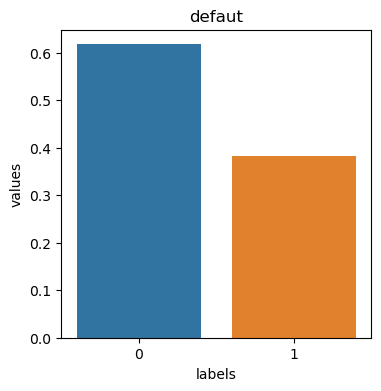

In [20]:
temp = quora.is_duplicate.value_counts()
df_class = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(quora)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()

### 3.2.2.Text Length Distribution :

Text(0, 0.5, 'Frequency')

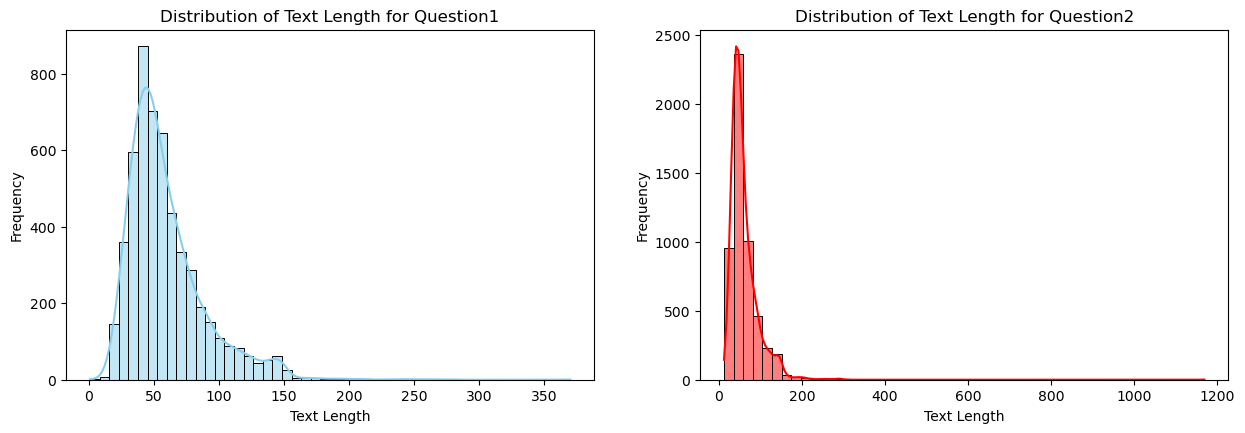

In [84]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(data=quora,x=quora['question1'].astype(str).apply(len),kde=True,bins=50,color='skyblue')
plt.title('Distribution of Text Length for Question1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
sns.histplot(data=quora,x=quora['question2'].astype(str).apply(len),kde=True,bins=50,color='red')
plt.title('Distribution of Text Length for Question2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

### Biggram

In [86]:
# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_q1 = vectorizer.fit_transform(quora['question1'])

# Get feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

top_bigrams = pd.DataFrame(bigrams_q1.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q1 = top_bigrams.sort_values(by='Count', ascending=False).head(20)

bigrams_q2 = vectorizer.fit_transform(quora['question2'])

feature_names = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame(bigrams_q2.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q2 = top_bigrams.sort_values(by='Count', ascending=False).head(20)


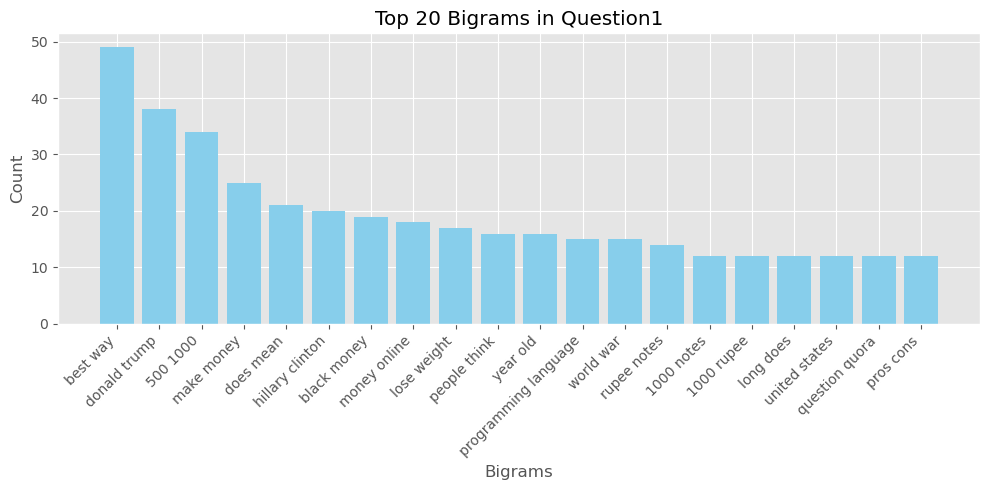

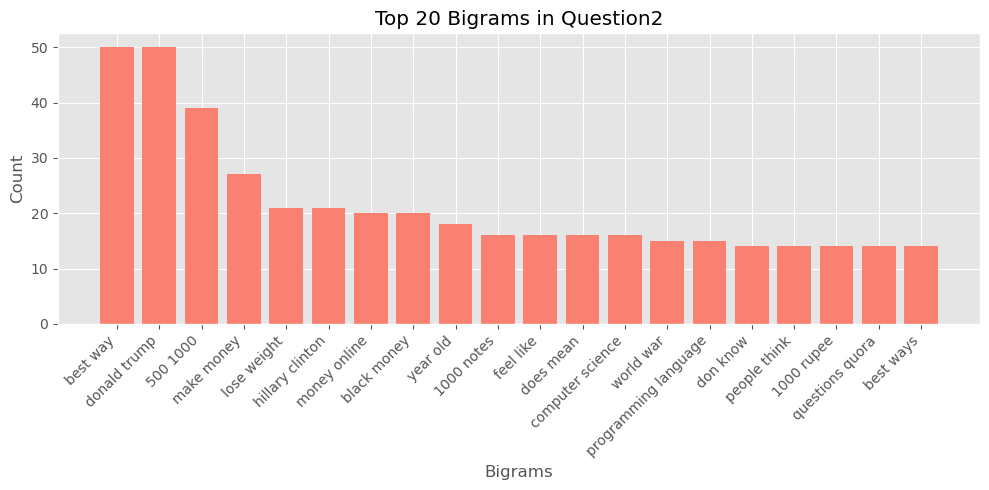

In [87]:
# Set the style for the plots
plt.style.use('ggplot')

# Plot histograms for top bigrams in question1
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q1.index, top_bigrams_q1['Count'], color='skyblue')
plt.title('Top 20 Bigrams in Question1')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot histograms for top bigrams in question2
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q2.index, top_bigrams_q2['Count'], color='salmon')
plt.title('Top 20 Bigrams in Question2')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### constraction to expression

In [21]:
# Contractions dictionary
contractions_dict = {
    "aren't": "are not",
    "can't": "cannot",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "I'll": "I will",
    "I'm": "I am",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "she's": "she is",
    "shouldn't": "should not",
    "wasn't": "was not",
    "we'll": "we will",
    "we're": "we are",
    "weren't": "were not",
    "won't": "will not",
    "wouldn't": "would not",
    "you'll": "you will",
    "you're": "you are",
    "aren't": "are not"
}


In [22]:
def con_to_exp(x):
    if type(x) is str:
        x=x.replace('\\','')
        for key in contractions_dict:
            value=contractions_dict[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [23]:
quora['review_q1']=''
quora['review_q2']=''

In [24]:
with tqdm(total=len(quora), desc="con_to_exp running") as pbar:

    for i in tqdm(range(len(quora)),desc="con_to_exp running"):
        quora.at[i,'review_q1']=con_to_exp(quora.at[i,'question1'])
        quora.at[i,'review_q2']=con_to_exp(quora.at[i,'question2'])
        pbar.update(1) 

con_to_exp running: 100%|████████████████| 5290/5290 [00:00<00:00, 14287.13it/s]


In [25]:
quora.tail(3)

,id,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2
5287,5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?
5288,5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?
5289,5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...


In [26]:
quora[1:2]

,id,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...


### Clean Text

In [27]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Added ^ to negate the character class
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # convert numeric data to text data as like '5 to five'
    p = inflect.engine()
    words=text.split()
    for i,word in enumerate(words):
        if word.isdigit():
            words[i]=p.number_to_words(word)
    text = ' '.join(words)

    return text

In [28]:
quora['clean_q1'] = ""
quora['clean_q1'] = ""

In [29]:
# Use tqdm to track progress

In [30]:
with tqdm(total=len(quora)) as pbar:

    for i in tqdm(range(len(quora)),desc="clean text running"):
        quora.at[i,'clean_q1']=clean_text(quora.at[i,'review_q1'])
        quora.at[i,'clean_q2']=clean_text(quora.at[i,'review_q2'])
        pbar.update(1) 

100%|█████████████████████████████████████| 5290/5290 [00:02<00:00, 2363.55it/s]


In [31]:
quora

,id,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water
...,...,...,...,...,...,...,...,...,...,...
5285,5285,10405,10406,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,1,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,Is it necessary to do digital marketing course,Is there any use by doing digital marketing co...
5286,5286,10407,10408,I am mechanical engineer. can I opted for data...,Experiences of IPS?,0,I am mechanical engineer. can I opted for data...,Experiences of IPS?,I am mechanical engineer can I opted for data ...,Experiences of IPS
5287,5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,Is it necessary to have sex in relationship,Is sex really important in a relationship
5288,5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,Why did Hitler kill Jews people,How did Adolf Hitler kill Jews people and why


In [32]:
quora.clean_q1

0       What is the step by step guide to invest in sh...
1          What is the story of Kohinoor KohiNoor Diamond
2       How can I increase the speed of my internet co...
3        Why am I mentally very lonely How can I solve it
4       Which one dissolve in water quikly sugar salt ...
                              ...                        
5285       Is it necessary to do digital marketing course
5286    I am mechanical engineer can I opted for data ...
5287          Is it necessary to have sex in relationship
5288                      Why did Hitler kill Jews people
5289    Are chicken guns still used to test plane wind...
Name: clean_q1, Length: 5290, dtype: object

In [33]:
quora.clean_q1

0       What is the step by step guide to invest in sh...
1          What is the story of Kohinoor KohiNoor Diamond
2       How can I increase the speed of my internet co...
3        Why am I mentally very lonely How can I solve it
4       Which one dissolve in water quikly sugar salt ...
                              ...                        
5285       Is it necessary to do digital marketing course
5286    I am mechanical engineer can I opted for data ...
5287          Is it necessary to have sex in relationship
5288                      Why did Hitler kill Jews people
5289    Are chicken guns still used to test plane wind...
Name: clean_q1, Length: 5290, dtype: object

### remove duplicate words

In [34]:
def remove_duplicate_words(text):
    words=nltk.word_tokenize(text)
    unique_words=list(set(words))
    text=' '.join(unique_words)
    return text.lower()


In [35]:
for i in tqdm(range(len(quora)), desc='Words duplicates removal...'):
    quora.at[i, 'clean_q1'] = remove_duplicate_words((quora.at[i, 'clean_q1']).lower())
    quora.at[i, 'clean_q2'] = remove_duplicate_words((quora.at[i, 'clean_q2']).lower())

Words duplicates removal...: 100%|████████| 5290/5290 [00:01<00:00, 4499.06it/s]


In [36]:
quora.tail(3)

,id,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2
5287,5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,to have necessary is in relationship sex it,is in relationship sex really a important
5288,5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people why kill did jews hitler,people why how kill adolf did and jews hitler
5289,5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,to plane chicken guns still are test used wind...,to why instead chicken stones airbus guns of t...


### Text Preprocessing

In [37]:
def text_preprocessing(text):
    # Tokenization
    words = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in filtered_words]
    text = ' '.join(text)

    return text

In [38]:
for i in tqdm(range(len(quora)), desc='Words duplicates removal...'):
    quora.at[i, 'clean_q1'] = text_preprocessing(quora.at[i, 'clean_q1'])
    quora.at[i, 'clean_q2'] = text_preprocessing(quora.at[i, 'clean_q2'])

Words duplicates removal...: 100%|████████| 5290/5290 [00:03<00:00, 1556.63it/s]


In [39]:
quora.tail(3)

,id,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2
5287,5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important
5288,5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler
5289,5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,plane chicken gun still test used windshield,instead chicken stone airbus gun test used win...


In [40]:
quora=quora.drop('id',axis=1)

## <span style="color : #00B4DB">3.3.Feature Extraction</span>

freq_qid1 = Frequency of qid1's\
freq_qid2 = Frequency of qid2's\
q1len = Length of q1\
q2len = Length of q2\
q1_n_words = Number of words in Question 1\
q2_n_words = Number of words in Question 2\
word_Common = (Number of common unique words in Question 1 and Question 2)\
word_Total =(Total num of words in Question 1 + Total num of words in Question 2)\
word_share = (word_common)/(word_Total)\
freq_q1+freq_q2 = sum total of frequency of qid1 and qid2\
freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2

`frequency of qid`

In [41]:
quora.head(5)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely solve,", thousand find divided remainder math2324math..."
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,methane water sugar carbon di quikly dissolve ...,water fish survive salt would


`question1 lengh`

In [42]:
quora['length_q1']=quora['clean_q1'].apply(lambda x : len(x))
quora['length_q2']=quora['clean_q2'].apply(lambda x : len(x))

In [43]:
quora.head(3)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,30
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,58
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,36


`freq_q1+freq_q2`

`count words`

In [44]:
quora['word_q1']=quora['clean_q1'].apply(lambda z: len(word_tokenize(z)))
quora['word_q2']=quora['clean_q2'].apply(lambda z: len(word_tokenize(z)))

In [45]:
quora.tail(3)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,33,3,4
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,28,4,5
5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,plane chicken gun still test used windshield,instead chicken stone airbus gun test used win...,44,53,7,8


`count common word`

In [46]:
def common_word(row):
    text1 = row['clean_q1']
    text2 = row['clean_q2']
    words1 = set(word_tokenize(text1))
    words2 = set(word_tokenize(text2))
    
    common_words = words1 & words2
    return len(common_words)

# Assuming 'quora' is a DataFrame and 'clean_q1' and 'clean_q2' are columns
quora['common_word'] = tqdm(quora.apply(common_word, axis=1), desc='Common Words Extraction...')

Common Words Extraction...: 100%|██████| 5290/5290 [00:00<00:00, 4479682.65it/s]


In [47]:
quora.tail(3)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,33,3,4,2
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,28,4,5,4
5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,plane chicken gun still test used windshield,instead chicken stone airbus gun test used win...,44,53,7,8,5


`total word`

In [48]:
def total_word(row):
    text1 = row['clean_q1']
    text2 = row['clean_q2']
    

    words1 = set(word_tokenize(text1))
    words2 = set(word_tokenize(text2))

    total_words = words1 | words2
    return len(total_words)


quora['total_word'] = tqdm(quora.apply(total_word, axis=1), desc='Common Words Extraction...')

Common Words Extraction...: 100%|██████| 5290/5290 [00:00<00:00, 4487837.41it/s]


In [49]:
quora.head(2)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word,total_word
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,30,6,5,5,6
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,58,3,8,2,9


`word_share`

In [50]:
def word_share(row):
    text1 = row['clean_q1']
    text2 = row['clean_q2']

    words1 = set(word_tokenize(text1))
    words2 = set(word_tokenize(text2))

    common_words = words1 & words2
    total_words = words1 | words2

    if len(total_words) == 0:
        return 0  # Avoid division by zero

    share = len(common_words) / len(total_words) * 100
    return share

# Assuming 'quora' is a DataFrame
quora['word_share'] = tqdm(quora.apply(word_share, axis=1), desc='Word Share Calculation...')

Word Share Calculation...: 100%|███████| 5290/5290 [00:00<00:00, 5331059.14it/s]


In [51]:
quora.head(4)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word,total_word,word_share
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,30,6,5,5,6,83.333333
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,58,3,8,2,9,22.222222
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,36,6,5,2,9,22.222222
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely solve,", thousand find divided remainder math2324math...",21,76,3,10,0,13,0.000000


In [52]:
quora.tail(3)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word,total_word,word_share
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,33,3,4,2,5,40.0
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,28,4,5,4,5,80.0
5289,10413,10414,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,0,Are chicken guns still used to test plane wind...,Why were chicken guns used instead of stones t...,plane chicken gun still test used windshield,instead chicken stone airbus gun test used win...,44,53,7,8,5,10,50.0


In [53]:
def avarage_word_len(text):
    
    words=word_tokenize(text)
    avg_word_len=sum(len(word) for word in words)
    return avg_word_len

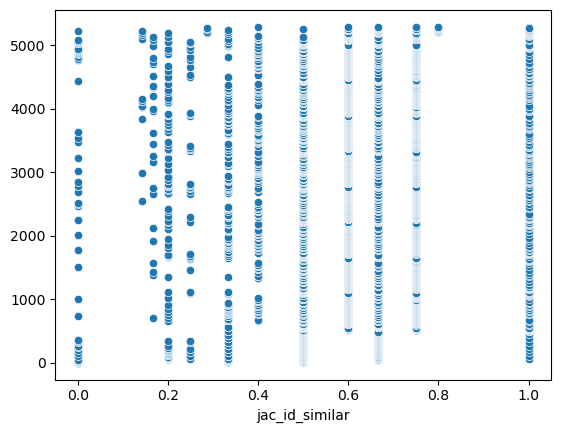

In [67]:
sns.scatterplot(data=quora, x='jac_id_similar', y=quora.index)
plt.show()

In [54]:
quora['avg_word_len_q1']=tqdm(quora['clean_q1'].apply(lambda x : avarage_word_len(x) ))
quora['avg_word_len_q2']=tqdm(quora['clean_q2'].apply(lambda x : avarage_word_len(x) ))


100%|██████████████████████████████████| 5290/5290 [00:00<00:00, 5440870.07it/s]


In [55]:
quora

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word,total_word,word_share,avg_word_len_q1,avg_word_len_q2
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,30,6,5,5,6,83.333333,31,26
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,58,3,8,2,9,22.222222,20,51
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,36,6,5,2,9,22.222222,39,32
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely solve,", thousand find divided remainder math2324math...",21,76,3,10,0,13,0.000000,19,67
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,methane water sugar carbon di quikly dissolve ...,water fish survive salt would,60,29,10,5,2,13,15.384615,51,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,10405,10406,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,1,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,necessary digital marketing course,digital marketing course use,34,28,4,4,3,5,60.000000,31,25
5286,10407,10408,I am mechanical engineer. can I opted for data...,Experiences of IPS?,0,I am mechanical engineer. can I opted for data...,Experiences of IPS?,opted mechanical engineer data science profession,experience ip,49,13,6,2,0,8,0.000000,44,12
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,33,3,4,2,5,40.000000,24,30
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,28,4,5,4,5,80.000000,19,24


`count character`

In [56]:
all_clean_q1_without_spce= quora['clean_q1'].str.replace(' ', '')
all_clean_q2_without_spce= quora['clean_q2'].str.replace(' ', '')

quora['total_char_q1']=all_clean_q1_without_spce.apply(len)
quora['total_char_q2']=all_clean_q2_without_spce.apply(len)


In [57]:
quora.head(3)

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,length_q2,word_q1,word_q2,common_word,total_word,word_share,avg_word_len_q1,avg_word_len_q2,total_char_q1,total_char_q2
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,30,6,5,5,6,83.333333,31,26,31,26
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,58,3,8,2,9,22.222222,20,51,20,51
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,36,6,5,2,9,22.222222,39,32,39,32


# Feature Engineering

## Numerical Features:

### Jaccard similarity

In [58]:
def jaccard_similarity(set_a,set_b):
    
    set_a_token = set(word_tokenize(set_a))
    set_b_token = set(word_tokenize(set_b))
    
    intersection = set_a_token.intersection(set_b_token)
    union = set_a_token.union(set_b_token)

    jaccard_score = (float(len(intersection)) / float(len(union)))

    return jaccard_score if union !=0 else 0.0


In [59]:
quora['jac_similar'] = tqdm(quora.apply(lambda row: jaccard_similarity(row['clean_q1'], row['clean_q2']), axis=1),
                            desc='Jaccard similarity check')

Jaccard similarity check: 100%|████████| 5290/5290 [00:00<00:00, 5338755.57it/s]


In [60]:
quora['jac_distance']=quora['jac_similar'].apply(lambda x: 1-x)

`Jaccard similarity in qid1 and qid2`

In [61]:
def jaccard_id_similarity(id1, id2):
    set1 = set(str(id1))
    set2 = set(str(id2))
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0.0

# Apply the Jaccard Similarity function to create a new feature
quora['jac_id_similar'] = tqdm(quora.apply(lambda row: jaccard_id_similarity(row['qid1'], row['qid2']), axis=1),
                               desc='Jaccard similarity check')

Jaccard similarity check: 100%|████████| 5290/5290 [00:00<00:00, 3917349.60it/s]


`check duplicate and similarity in the rows`

In [62]:
#check duplicate rows
threshold=1.0
duplicate_row=quora[quora['jac_id_similar']==1]
quora

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,...,common_word,total_word,word_share,avg_word_len_q1,avg_word_len_q2,total_char_q1,total_char_q2,jac_similar,jac_distance,jac_id_similar
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,...,5,6,83.333333,31,26,31,26,0.833333,0.166667,0.00
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,...,2,9,22.222222,20,51,20,51,0.222222,0.777778,0.00
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,...,2,9,22.222222,39,32,39,32,0.222222,0.777778,0.00
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely solve,", thousand find divided remainder math2324math...",21,...,0,13,0.000000,19,67,19,67,0.000000,1.000000,0.00
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,methane water sugar carbon di quikly dissolve ...,water fish survive salt would,60,...,2,13,15.384615,51,25,51,25,0.153846,0.846154,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,10405,10406,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,1,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,necessary digital marketing course,digital marketing course use,34,...,3,5,60.000000,31,25,31,25,0.600000,0.400000,0.60
5286,10407,10408,I am mechanical engineer. can I opted for data...,Experiences of IPS?,0,I am mechanical engineer. can I opted for data...,Experiences of IPS?,opted mechanical engineer data science profession,experience ip,49,...,0,8,0.000000,44,12,44,12,0.000000,1.000000,0.60
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,...,2,5,40.000000,24,30,24,30,0.400000,0.600000,0.75
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,...,4,5,80.000000,19,24,19,24,0.800000,0.200000,0.75


In [63]:
quora.jac_id_similar.value_counts()

0.750000    1408
0.600000    1399
0.500000     994
0.666667     547
1.000000     243
0.333333     228
0.400000     202
0.200000      99
0.000000      58
0.250000      45
0.166667      25
0.800000      25
0.142857      13
0.285714       4
Name: jac_id_similar, dtype: int64

### CountVectorizer

In [64]:
# Replace them with the actual column names if they are different
clean_q1 = quora['clean_q1']
clean_q2 = quora['clean_q2']

# Create a CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the 'clean_q1' and 'clean_q2' columns using the CountVectorizer
bag_of_words_q1 = count_vectorizer.fit_transform(clean_q1).toarray()
bag_of_words_q2 = count_vectorizer.transform(clean_q2).toarray()

# Get feature names (terms)
feature_names = count_vectorizer.get_feature_names_out()

# Create DataFrames to display Bag of Words values for 'clean_q1' and 'clean_q2'
df_bow_q1 = pd.DataFrame(data=bag_of_words_q1, columns=[f'{feature}_q1' for feature in feature_names])
df_bow_q2 = pd.DataFrame(data=bag_of_words_q2, columns=[f'{feature}_q2' for feature in feature_names])

# Concatenate the Bag of Words DataFrames with the original DataFrame horizontally (hstack)
quora = pd.concat([quora, df_bow_q1, df_bow_q2], axis=1)


In [89]:
quora.shape

(5290, 14925)

In [66]:
quora.jac_id_similar.value_counts()

0.750000    1408
0.600000    1399
0.500000     994
0.666667     547
1.000000     243
0.333333     228
0.400000     202
0.200000      99
0.000000      58
0.250000      45
0.166667      25
0.800000      25
0.142857      13
0.285714       4
Name: jac_id_similar, dtype: int64

In [74]:
quora

,qid1,qid2,question1,question2,is_duplicate,review_q1,review_q2,clean_q1,clean_q2,length_q1,...,zee_q2,zero_q2,zhukov_q2,zika_q2,zinc_q2,zionism_q2,zoho_q2,zomato_q2,zondlecom_q2,zone_q2
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,share guide invest market step india,share guide invest market step,36,...,0,0,0,0,0,0,0,0,0,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,kohinoor story diamond,indian kohinoor stole government diamond happe...,22,...,0,0,0,0,0,0,0,0,0,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,using speed connection internet vpn increase,hacking speed internet dns increased,44,...,0,0,0,0,0,0,0,0,0,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely solve,", thousand find divided remainder math2324math...",21,...,0,0,0,0,0,0,0,0,0,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,methane water sugar carbon di quikly dissolve ...,water fish survive salt would,60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,10405,10406,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,1,Is it necessary to do digital marketing course?,Is there any use by doing digital marketing co...,necessary digital marketing course,digital marketing course use,34,...,0,0,0,0,0,0,0,0,0,0
5286,10407,10408,I am mechanical engineer. can I opted for data...,Experiences of IPS?,0,I am mechanical engineer. can I opted for data...,Experiences of IPS?,opted mechanical engineer data science profession,experience ip,49,...,0,0,0,0,0,0,0,0,0,0
5287,10409,10410,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,1,Is it necessary to have sex in relationship?,Is sex really important in a relationship?,necessary relationship sex,relationship sex really important,26,...,0,0,0,0,0,0,0,0,0,0
5288,10411,10412,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,1,Why did Hitler kill Jews people?,How did Adolf Hitler kill Jews people and why?,people kill jew hitler,people kill adolf jew hitler,22,...,0,0,0,0,0,0,0,0,0,0


## <span style="color : #00B4DB">3.3.Corellation Analysis</span>

# <span style="color:#6dd5ed">4. Machine Learning Approach🧠 :</span>

## <span style='color:#00B4DB'>4.1.Train test split: </span> 

In [103]:
# Assuming 'processed_questions' contains preprocessed text
X = quora[['question1', 'question2']]
y = quora['is_duplicate']

X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)
X['combined'] = X['combined'].fillna('')

In [107]:
X['combined'] 

0       What is the step by step guide to invest in sh...
1       What is the story of Kohinoor (Koh-i-Noor) Dia...
2       How can I increase the speed of my internet co...
3       Why am I mentally very lonely? How can I solve...
4       Which one dissolve in water quikly sugar, salt...
                              ...                        
5285    Is it necessary to do digital marketing course...
5286    I am mechanical engineer. can I opted for data...
5287    Is it necessary to have sex in relationship? I...
5288    Why did Hitler kill Jews people? How did Adolf...
5289    Are chicken guns still used to test plane wind...
Name: combined, Length: 5290, dtype: object

In [109]:
x_train,x_test,y_train,y_test=train_test_split( X['combined'],y,test_size=0.3,random_state=42 )

In [110]:
tfidf_vectorizer=TfidfVectorizer()
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf=tfidf_vectorizer.transform(x_test)

In [114]:
x_train_tfidf.shape 

(3703, 8759)

In [118]:
print(x_train_tfidf.shape, '  ', len(x_train))

(3703, 8759)    3703


## <span style='color:#00B4DB'>4.2.Logistic Regression: </span> 

In [120]:
lr=LogisticRegression()
lr.fit(x_train_tfidf,y_train)

LogisticRegression()

In [123]:
predictions = lr.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.6735979836168872
[[860 102]
 [416 209]]


## <span style='color:#00B4DB'>4.2.XGBoots classifier : </span> 

In [125]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.0 MB/s eta 0:00:000m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = quora[['question1', 'question2']]
y = quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# XGBoost Classifier
classifier = XGBClassifier(verbose=1)

# Fit the model
classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.6635160680529301
[[495 153]
 [203 207]]
